# Research/Practice in Pandas and Matplot/Seaborn

In [2]:
# Import the data manipulation/visualization tools 
import pandas as pd 
import matplotlib as plt
import seaborn as sns

In [3]:
# Import the data file I want to work with 
SatData = pd.read_csv('/Users/ethannordman/Desktop/Data Mine/st_ethansoc18@gmail_com_20251016_1921235091.csv') # this is the data frame/set I will be using 

## Looking at the data set

In [4]:
SatData.head()

,ORDINAL,COMMENT,ORIGINATOR,NORAD_CAT_ID,OBJECT_NAME,OBJECT_TYPE,CLASSIFICATION_TYPE,INTLDES,EPOCH,EPOCH_MICROSECONDS,...,TLE_LINE0,TLE_LINE1,TLE_LINE2,OBJECT_ID,OBJECT_NUMBER,SEMIMAJOR_AXIS,PERIOD,APOGEE,PERIGEE,DECAYED
0,1,GENERATED VIA SPACETRACK.ORG API,18 SPCS,4,EXPLORER 1,PAYLOAD,U,58001A,1970-03-31 00:50:24,429408,...,0 EXPLORER 1,1 00004U 58001 A 70090.03500497 .07718844 +0...,2 00004 033.1468 334.6171 0024739 311.5310 048...,1958-001A,4,6577.283,88.477,215.420,182.877,1
1,2,GENERATED VIA SPACETRACK.ORG API,18 SPCS,4,EXPLORER 1,PAYLOAD,U,58001A,1970-03-11 11:45:20,937888,...,0 EXPLORER 1,1 00004U 58001 A 70070.48982567 .00566797 +0...,2 00004 033.1550 113.3945 0123689 137.1711 223...,1958-001A,4,6729.726,91.570,434.830,268.352,1
2,3,GENERATED VIA SPACETRACK.ORG API,18 SPCS,4,EXPLORER 1,PAYLOAD,U,58001A,1970-03-08 13:36:34,738272,...,0 EXPLORER 1,1 00004U 58001 A 70067.56706873 .00455213 +0...,2 00004 033.1406 133.5462 0135609 105.6161 255...,1958-001A,4,6740.034,91.781,453.300,270.498,1
3,4,GENERATED VIA SPACETRACK.ORG API,18 SPCS,4,EXPLORER 1,PAYLOAD,U,58001A,1970-03-07 07:03:51,153119,...,0 EXPLORER 1,1 00004U 58001 A 70066.29434205 .00407548 +0...,2 00004 033.1410 142.3259 0138109 092.4409 269...,1958-001A,4,6744.012,91.862,459.017,272.736,1
4,5,GENERATED VIA SPACETRACK.ORG API,18 SPCS,4,EXPLORER 1,PAYLOAD,U,58001A,1970-03-03 08:12:52,476191,...,0 EXPLORER 1,1 00004U 58001 A 70062.34227403 .00389872 +0...,2 00004 033.1407 169.4863 0139809 053.8435 307...,1958-001A,4,6753.483,92.056,469.768,280.928,1


# Count the object names 

In [5]:
Num_Sats = SatData['OBJECT_NAME'].unique()

print(Num_Sats)

['EXPLORER 1' 'SPUTNIK 3' 'EXPLORER 4' ... 'OPS 6630 (2)' 'COSMOS 608'
 'COSMOS 609']


# Identify which satellites belong to which country

In [6]:
SatByName = SatData.groupby('OBJECT_NAME')['ORIGINATOR'].count()

SatByName

# this is to find the number of satellites per name 

OBJECT_NAME
0.1 SQ METER TARGET     5
A-1 (ASTERIX)           5
AEROS (GRS-B)           1
AGENA TARGET           20
ALOUETTE 1 (S-27)       5
                       ..
VOSTOK 4                3
VOSTOK 5                5
VOSTOK 6                3
WIKA (DIAL)             5
ZOND 4                  1
Name: ORIGINATOR, Length: 1099, dtype: int64

In [7]:
# Consoldate data to a manageable amount fo data 

headSection = SatData.head(100)

headSection

,ORDINAL,COMMENT,ORIGINATOR,NORAD_CAT_ID,OBJECT_NAME,OBJECT_TYPE,CLASSIFICATION_TYPE,INTLDES,EPOCH,EPOCH_MICROSECONDS,...,TLE_LINE0,TLE_LINE1,TLE_LINE2,OBJECT_ID,OBJECT_NUMBER,SEMIMAJOR_AXIS,PERIOD,APOGEE,PERIGEE,DECAYED
0,1,GENERATED VIA SPACETRACK.ORG API,18 SPCS,4,EXPLORER 1,PAYLOAD,U,58001A,1970-03-31 00:50:24,429408,...,0 EXPLORER 1,1 00004U 58001 A 70090.03500497 .07718844 +0...,2 00004 033.1468 334.6171 0024739 311.5310 048...,1958-001A,4,6577.283,88.477,215.420,182.877,1
1,2,GENERATED VIA SPACETRACK.ORG API,18 SPCS,4,EXPLORER 1,PAYLOAD,U,58001A,1970-03-11 11:45:20,937888,...,0 EXPLORER 1,1 00004U 58001 A 70070.48982567 .00566797 +0...,2 00004 033.1550 113.3945 0123689 137.1711 223...,1958-001A,4,6729.726,91.570,434.830,268.352,1
2,3,GENERATED VIA SPACETRACK.ORG API,18 SPCS,4,EXPLORER 1,PAYLOAD,U,58001A,1970-03-08 13:36:34,738272,...,0 EXPLORER 1,1 00004U 58001 A 70067.56706873 .00455213 +0...,2 00004 033.1406 133.5462 0135609 105.6161 255...,1958-001A,4,6740.034,91.781,453.300,270.498,1
3,4,GENERATED VIA SPACETRACK.ORG API,18 SPCS,4,EXPLORER 1,PAYLOAD,U,58001A,1970-03-07 07:03:51,153119,...,0 EXPLORER 1,1 00004U 58001 A 70066.29434205 .00407548 +0...,2 00004 033.1410 142.3259 0138109 092.4409 269...,1958-001A,4,6744.012,91.862,459.017,272.736,1
4,5,GENERATED VIA SPACETRACK.ORG API,18 SPCS,4,EXPLORER 1,PAYLOAD,U,58001A,1970-03-03 08:12:52,476191,...,0 EXPLORER 1,1 00004U 58001 A 70062.34227403 .00389872 +0...,2 00004 033.1407 169.4863 0139809 053.8435 307...,1958-001A,4,6753.483,92.056,469.768,280.928,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3,GENERATED VIA SPACETRACK.ORG API,18 SPCS,57,DISCOVERER 15,PAYLOAD,U,60012A,1960-10-12 19:22:33,735360,...,0 DISCOVERER 15,1 00057U 60012 A 60286.80733490 .01724231 +0...,2 00057 080.8999 355.5879 0189113 059.8749 301...,1960-012A,57,6665.107,90.255,413.017,160.926,1
96,4,GENERATED VIA SPACETRACK.ORG API,18 SPCS,57,DISCOVERER 15,PAYLOAD,U,60012A,1960-10-09 15:51:30,564288,...,0 DISCOVERER 15,1 00057U 60012 A 60283.66077042 .01570454 +0...,2 00057 080.8999 359.8048 0208531 071.5387 289...,1960-012A,57,6694.740,90.857,456.211,176.999,1
97,5,GENERATED VIA SPACETRACK.ORG API,18 SPCS,57,DISCOVERER 15,PAYLOAD,U,60012A,1960-10-07 03:06:39,133440,...,0 DISCOVERER 15,1 00057U 60012 A 60281.12961960 .01133975 +0...,2 00057 080.8999 003.1403 0213104 080.7647 280...,1960-012A,57,6721.930,91.411,487.042,200.548,1
98,1,GENERATED VIA SPACETRACK.ORG API,18 SPCS,58,COURIER 1B,PAYLOAD,U,60013A,2025-10-16 04:17:05,768736,...,0 COURIER 1B,1 00058U 60013A 25289.17853899 .00000136 0...,2 00058 28.3283 297.8674 0164867 347.3111 12...,1960-013A,58,7463.604,106.950,1208.519,962.419,0


# Visualize the number of Satellites by the name (100)

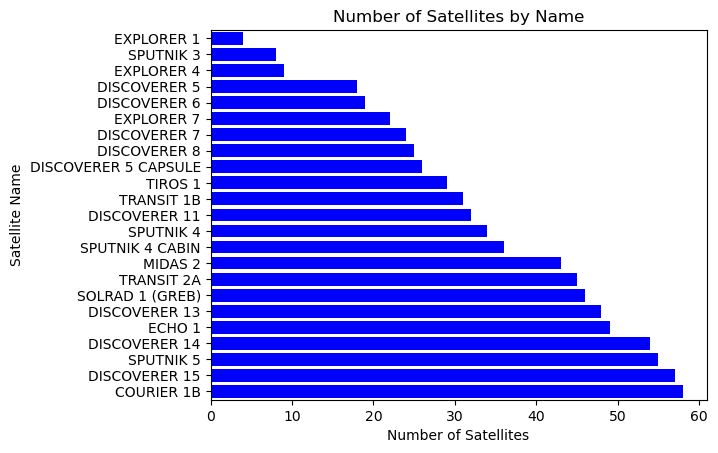

In [10]:
import matplotlib.pyplot as plt

plt.barh(headSection['OBJECT_NAME'], headSection['NORAD_CAT_ID'], color='blue')

plt.title('Number of Satellites by Name')
plt.xlabel('Number of Satellites')
plt.ylabel('Satellite Name')
plt.margins(y=0.005)

plt.gca().invert_yaxis()

We can see out of the first 100 satellites that the COURIER 1B has the most satellites 

# Find the Apogee data

In [11]:
ApoMax = SatData['APOGEE'].max()

ApoMax


1995.961

In [12]:
ApoMin = SatData['APOGEE'].min()

ApoMin

150.881

In [13]:
ApoAvg = SatData['APOGEE'].mean()

ApoAvg

np.float64(510.3526072000001)

# Find the Perigee data

In [14]:
PerMax = SatData['PERIGEE'].max()

PerMax

1500.037

In [15]:
PerMin = SatData['PERIGEE'].min()

PerMin

150.01

In [16]:
PerAvg = SatData['PERIGEE'].mean()

PerAvg

np.float64(419.0301008)

# Combine the average Apogee and Perigee

In [17]:
AvgDistance = SatData[['APOGEE', 'PERIGEE']].mean()

print(AvgDistance)

APOGEE     510.352607
PERIGEE    419.030101
dtype: float64


So we now how the average perigee and apogee which is essentially the average distance of the satellites. This gives us a baseline of "normal" anything way above or below these would be considered "suspicious"

In [18]:
# Compute the deviation from the mean
SatData['Apogee_Deviation'] = SatData['APOGEE'] - AvgDistance['APOGEE'] # this is a pandas series column (Allows us to do math analysis)
SatData['Perigee_Deviation'] = SatData['PERIGEE'] - AvgDistance['PERIGEE']

Above we are looking at: for every satellite how far is its orbit from the average orbit of all satellites

In [19]:
# Compute the Absolute Deviation or Distance
SatData['Distance_Deviation'] = ((SatData['APOGEE'] - AvgDistance['APOGEE'])**2 + # we named this equation distance deviation
                                 (SatData['PERIGEE'] - AvgDistance['PERIGEE'])**2)**0.5

Above **2 is squaring the the values so there are no negatives. The **0.5 is essentially taking the sqare root, this will turn the squared sum into a usable distance.

In [20]:
# Define the "typical range"
Apogee_std = SatData['APOGEE'].std()
Perigee_std = SatData['PERIGEE'].std()

Above is just taking the standard deviation of the apogee and perigee

In [21]:
# Flag satellites
SatData['Within_Normal_Range'] = ((SatData['APOGEE'] >= AvgDistance['APOGEE'] - Apogee_std) &
                                  (SatData['APOGEE'] <= AvgDistance['APOGEE'] + Apogee_std) &
                                  (SatData['PERIGEE'] >= AvgDistance['PERIGEE'] - Perigee_std) &
                                  (SatData['PERIGEE'] <= AvgDistance['PERIGEE'] + Perigee_std))

SatData['Outlier'] = ~SatData['Within_Normal_Range']

Above for both the  average apogee and perigee we are saying that the apogee must be between +- one standard deviation

And then we are defining that an outlier occurs when the number is not within the normal range

In [22]:
outliers = SatData[SatData['Outlier']]

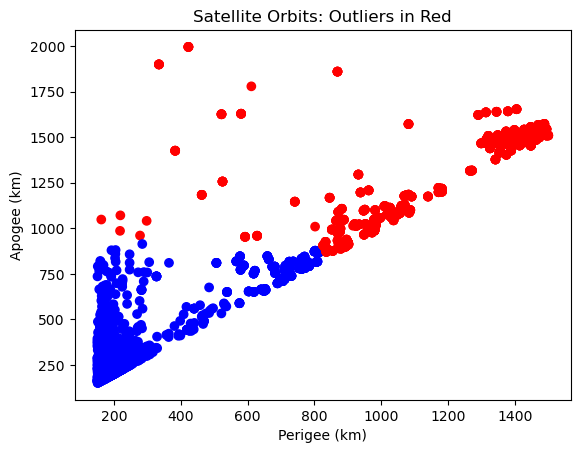

In [23]:
import matplotlib.pyplot as plt

plt.scatter(SatData['PERIGEE'], SatData['APOGEE'], c=SatData['Outlier'].map({True:'red', False:'blue'}))
plt.xlabel('Perigee (km)')
plt.ylabel('Apogee (km)')
plt.title('Satellite Orbits: Outliers in Red')
plt.show()

This table is showing the satellites within a "normal range" and the red dots are all satellites considered "Suspicious"

# Ranking The Outliers by Contribution to Risk

All of the factors that contribute to risk:
Distance_Deviation
Apogee/Perigee_Deviation
Eccentricity Apogee - Perigee
TLE Update frequency
Orignator
Object Type
Decay status

In [26]:
# Transform Numeric Columns (Z-Score)
SatData['Distance_Z'] = (SatData['Distance_Deviation'] - SatData['Distance_Deviation'].mean()) / SatData['Distance_Deviation'].std()

In [28]:
# Identify the High Risk Satellites
threshold = SatData['Distance_Z'].mean() + 2*SatData['Distance_Z'].std()
SatData['High_Risk'] = SatData['Distance_Z'] > threshold

In [ ]:
# Sort the values 
SatData.sort_values(by='Distance_Z', ascending=False).head(10)

,ORDINAL,COMMENT,ORIGINATOR,NORAD_CAT_ID,OBJECT_NAME,OBJECT_TYPE,CLASSIFICATION_TYPE,INTLDES,EPOCH,EPOCH_MICROSECONDS,...,PERIGEE,DECAYED,Apogee_Deviation,Perigee_Deviation,Distance_Deviation,Within_Normal_Range,Outlier,Suspicious,Distance_Z,High_Risk
1455,2,GENERATED VIA SPACETRACK.ORG API,18 SPCS,1588,COSMOS 90,PAYLOAD,U,65073E,2025-10-16 03:58:08,946048,...,1405.202,0,1143.691393,986.171899,1510.153971,False,True,True,3.141504,True
1457,4,GENERATED VIA SPACETRACK.ORG API,18 SPCS,1588,COSMOS 90,PAYLOAD,U,65073E,2025-10-15 19:58:50,720736,...,1405.203,0,1143.690393,986.172899,1510.153867,False,True,True,3.141503,True
1456,3,GENERATED VIA SPACETRACK.ORG API,18 SPCS,1588,COSMOS 90,PAYLOAD,U,65073E,2025-10-15 21:59:48,715584,...,1405.203,0,1143.690393,986.172899,1510.153867,False,True,True,3.141503,True
1458,5,GENERATED VIA SPACETRACK.ORG API,18 SPCS,1588,COSMOS 90,PAYLOAD,U,65073E,2025-10-15 13:54:53,525952,...,1405.212,0,1143.682393,986.181899,1510.153686,False,True,True,3.141503,True
1454,1,GENERATED VIA SPACETRACK.ORG API,18 SPCS,1588,COSMOS 90,PAYLOAD,U,65073E,2025-10-16 13:12:47,513952,...,1405.209,0,1143.684393,986.178899,1510.153241,False,True,True,3.141501,True
3951,2,GENERATED VIA SPACETRACK.ORG API,18 SPCS,5554,COSMOS 451,PAYLOAD,U,71086H,2025-10-16 03:56:45,943296,...,1488.354,0,1062.974393,1069.323899,1507.769267,False,True,True,3.134215,True
3950,1,GENERATED VIA SPACETRACK.ORG API,18 SPCS,5554,COSMOS 451,PAYLOAD,U,71086H,2025-10-16 13:31:50,159136,...,1488.352,0,1062.976393,1069.321899,1507.769258,False,True,True,3.134215,True
3953,4,GENERATED VIA SPACETRACK.ORG API,18 SPCS,5554,COSMOS 451,PAYLOAD,U,71086H,2025-10-15 18:20:05,122752,...,1488.350,0,1062.978393,1069.319899,1507.769250,False,True,True,3.134215,True
3952,3,GENERATED VIA SPACETRACK.ORG API,18 SPCS,5554,COSMOS 451,PAYLOAD,U,71086H,2025-10-15 22:31:59,619936,...,1488.352,0,1062.975393,1069.321899,1507.768553,False,True,True,3.134213,True
3954,5,GENERATED VIA SPACETRACK.ORG API,18 SPCS,5554,COSMOS 451,PAYLOAD,U,71086H,2025-10-15 14:38:22,23168,...,1488.348,0,1062.979393,1069.317899,1507.768536,False,True,True,3.134213,True


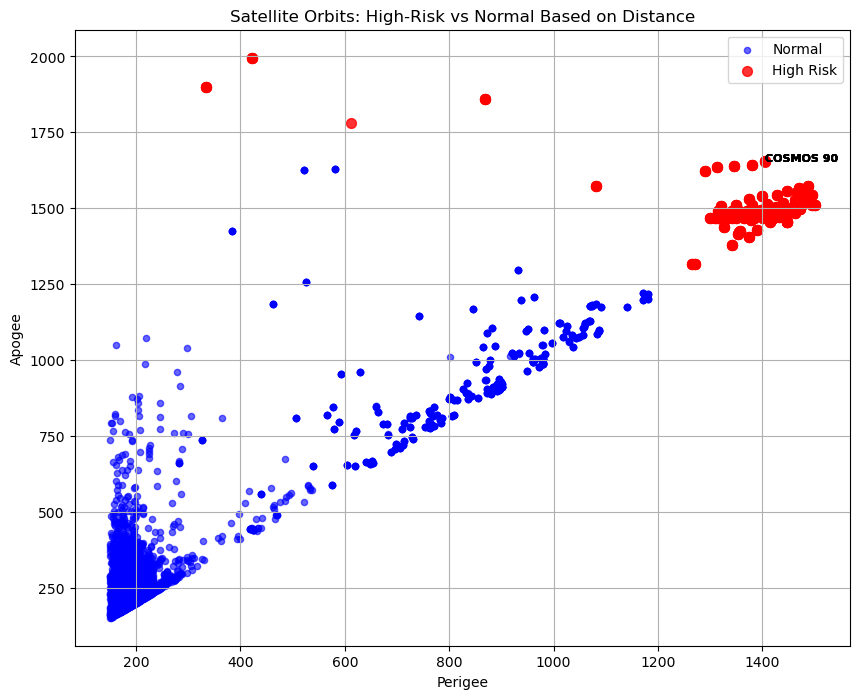

In [35]:
import matplotlib.pyplot as plt

# Create figure
plt.figure(figsize=(10, 8))

# Plot normal satellites
normal = SatData[SatData['High_Risk'] == False]
plt.scatter(normal['PERIGEE'], normal['APOGEE'],
            color='blue', alpha=0.6, label='Normal', s=20)

# Plot high-risk satellites
high_risk = SatData[SatData['High_Risk'] == True]
plt.scatter(high_risk['PERIGEE'], high_risk['APOGEE'],
            color='red', alpha=0.8, label='High Risk', s=50)

# Optional: annotate top 5 high-risk satellites
top_outliers = high_risk.sort_values(by='Distance_Z', ascending=False).head(5)
for idx, row in top_outliers.iterrows():
    plt.text(row['PERIGEE'], row['APOGEE'], row['OBJECT_NAME'],
             fontsize=8, color='black', weight='bold')

# Labels and title
plt.xlabel('Perigee')
plt.ylabel('Apogee')
plt.title('Satellite Orbits: High-Risk vs Normal Based on Distance')
plt.legend()
plt.grid(True)
plt.show()

# Risk based on TLEs

In [36]:
# Count how many TLEs each satellite has
TLE_count = SatData.groupby('OBJECT_NAME').size().rename('TLE_count')
SatData = SatData.merge(TLE_count, on='OBJECT_NAME')

In [37]:
# Make sure EPOCH is datetime
SatData['EPOCH'] = pd.to_datetime(SatData['EPOCH'])

# Sort by satellite and time
SatData = SatData.sort_values(['OBJECT_NAME', 'EPOCH'])

# Compute time differences between successive TLEs
SatData['Time_Diff'] = SatData.groupby('OBJECT_NAME')['EPOCH'].diff().dt.total_seconds()

# Average time difference per satellite
Update_freq = SatData.groupby('OBJECT_NAME')['Time_Diff'].mean().rename('Avg_TLE_Diff')

# Invert so that shorter gaps → higher frequency
Update_freq = 1 / Update_freq
SatData = SatData.merge(Update_freq, on='OBJECT_NAME')

In [38]:
from datetime import datetime

# Latest TLE per satellite
Latest_TLE = SatData.groupby('OBJECT_NAME')['EPOCH'].max().rename('Latest_TLE')

# Time since last TLE in days
Latest_TLE = (datetime.utcnow() - Latest_TLE).dt.total_seconds() / (3600*24)
SatData = SatData.merge(Latest_TLE.rename('TLE_age_days'), on='OBJECT_NAME')

/var/folders/5b/j6cfk3gs0ds6y6nzsqdg7ftw0000gn/T/ipykernel_63722/357871873.py:7: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  Latest_TLE = (datetime.utcnow() - Latest_TLE).dt.total_seconds() / (3600*24)


In [39]:
for col in ['TLE_count', 'Avg_TLE_Diff', 'TLE_age_days']:
    SatData[col + '_Z'] = (SatData[col] - SatData[col].mean()) / SatData[col].std()

In [40]:
# Example weights
w_count = 0.4
w_freq = 0.4
w_age = 0.2  # optional: invert if higher age = lower risk

SatData['TLE_Risk_Score'] = (
    w_count * SatData['TLE_count_Z'] +
    w_freq * SatData['Avg_TLE_Diff_Z'] +
    w_age * (-SatData['TLE_age_days_Z'])  # invert age
)

In [41]:
threshold = SatData['TLE_Risk_Score'].mean() + 2*SatData['TLE_Risk_Score'].std()
SatData['High_Risk_TLE'] = SatData['TLE_Risk_Score'] > threshold

In [42]:
high_risk = SatData[SatData['High_Risk_TLE']]
normal = SatData[~SatData['High_Risk_TLE']]

# Normalize high-risk scores for color
normed = (high_risk['TLE_Risk_Score'] - high_risk['TLE_Risk_Score'].min()) / (
          high_risk['TLE_Risk_Score'].max() - high_risk['TLE_Risk_Score'].min())

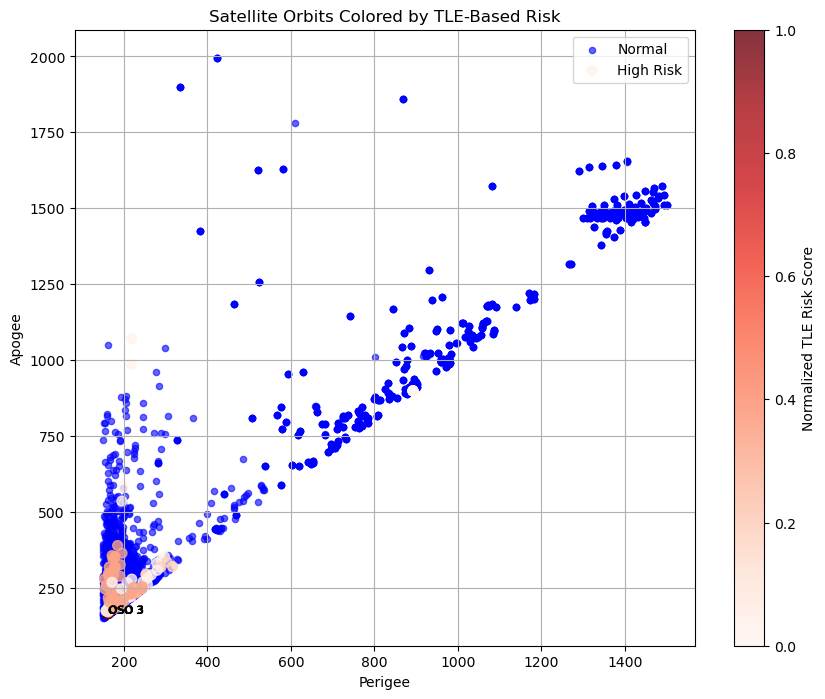

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

# Normal satellites
plt.scatter(normal['PERIGEE'], normal['APOGEE'], color='blue', s=20, alpha=0.6, label='Normal')

# High-risk satellites with color gradient
plt.scatter(high_risk['PERIGEE'], high_risk['APOGEE'], c=normed, cmap='Reds', s=50, alpha=0.8, label='High Risk')

# Optional: annotate top 5 TLE-risk satellites
top_outliers = high_risk.sort_values(by='TLE_Risk_Score', ascending=False).head(5)
for idx, row in top_outliers.iterrows():
    plt.text(row['PERIGEE'], row['APOGEE'], row['OBJECT_NAME'], fontsize=8, color='black')

# Labels and title
plt.xlabel('Perigee')
plt.ylabel('Apogee')
plt.title('Satellite Orbits Colored by TLE-Based Risk')
plt.colorbar(label='Normalized TLE Risk Score')  # shows gradient scale
plt.legend()
plt.grid(True)
plt.show()

In the table above we can see that distance is not the only factor when calculating risk. The amount of activity is also a factor to consider. We can we that satellites closer to the "normal" are adujsting more frequently.

In [44]:
# Select relevant columns for a risk summary
risk_table = SatData[['OBJECT_NAME', 'ORIGINATOR', 'APOGEE', 'PERIGEE',
                      'Distance_Z', 'TLE_Risk_Score', 'High_Risk', 'High_Risk_TLE']]

# Sort by one of the risk scores to highlight top-risk satellites
risk_table_sorted = risk_table.sort_values(by='TLE_Risk_Score', ascending=False)

# Display top 10 satellites
risk_table_sorted.head(10)

,OBJECT_NAME,ORIGINATOR,APOGEE,PERIGEE,Distance_Z,TLE_Risk_Score,High_Risk,High_Risk_TLE
4304,OSO 3,18 SPCS,166.810,163.609,-0.165735,8.932134,False,True
4305,OSO 3,18 SPCS,164.408,163.346,-0.159359,8.932134,False,True
4306,OSO 3,18 SPCS,164.570,161.292,-0.156015,8.932134,False,True
4307,OSO 3,18 SPCS,164.219,160.928,-0.154490,8.932134,False,True
4308,OSO 3,18 SPCS,164.219,160.925,-0.154484,8.932134,False,True
4811,THOR AGENA D,18 SPCS,318.297,179.306,-0.535321,3.750891,False,True
4826,THOR AGENA D,18 SPCS,278.360,153.845,-0.397260,3.750891,False,True
4820,THOR AGENA D,18 SPCS,287.872,190.609,-0.499579,3.750891,False,True
4821,THOR AGENA D,18 SPCS,245.808,184.178,-0.392950,3.750891,False,True
4822,THOR AGENA D,18 SPCS,225.406,180.946,-0.339249,3.750891,False,True


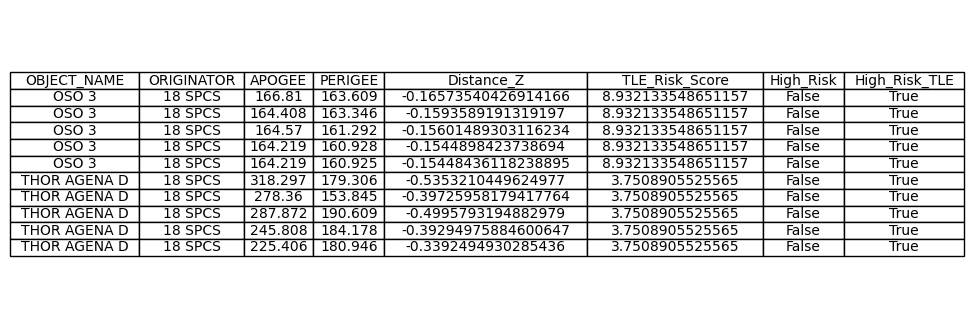

In [45]:
import matplotlib.pyplot as plt

# Take top 10 satellites by TLE risk
top10 = risk_table_sorted.head(10)

# Create figure
fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('off')  # hide axes

# Create table
table = ax.table(cellText=top10.values,
                 colLabels=top10.columns,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(top10.columns))))

plt.show()